#Name : SUPRIYO PAL

## Data
- **The SMS (text) data was downloaded from UCI datasets.**
- **It contains 5,574 SMS phone messages.**
- **The data were collected for the purpose of mobile phone spam research and have already been labeled as either spam or ham**

# Steps
-  **Import all the necessary Libraries for analysis, Visualization, Algorithms**
-   **Explore Data Analysis**
-   **Using NLP stopwords, tokenization**
-   **split the dataset**
-   **Build the model** 
-   **Use statical model analysis perfrom classification report(Confusion matrix , cohhen_kappa_score, AUC, ROC,accuracy)**

#### Import the modules needed.

In [ ]:
# Import Pandas and NumPy


# importing numpy be used as an efficient multi-dimensional container of generic data.
import numpy as np  

#importing pandas it allows you to perform data manipulation create, manipulate and wrangle the data in python.
import pandas as pd


#   ---------- # Visualizations---------

# Import Libraries for plotting 

#Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


# importing NLTK (Natrual Language Tool Kit)
import nltk
#importing stopwords
from nltk.corpus import stopwords

#import string
import string


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import re


In [ ]:
# Read the data of credit card fraud detection
# Here file is CSV i.e Comma Seperated Values
#df is a variable

df = pd.read_csv("/content/spam.csv")

In [ ]:
df.head()
#Understand your data using the head() function to look at the first few rows.

# Checking the first 5 rows

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

#### shape 
- Know the shape of the dataset , how many rows and columns .
- shape[0] is rows 
- shape[1] is columns 

In [ ]:

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5572 rows and 2 columns are present in the Data Set


### info()
> -This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [ ]:
df.info()

# # To know the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.dtypes

Label        object
EmailText    object
dtype: object

#### The describe() 
- Describe method from pandas provide a summary statistics

In [ ]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Note**
- Let’s get the summary statistics and visualize the data. 
- The describe() method from pandas provide a summary statistics. Such as, there are 5,572 labels and messages. 
- There are two unique labels indicating for “ham” and “spam”.
- We can also observe that there are less unique messages (5,169) than total message count(5,572) indicating some repeated messages.
- The top label is “ham” and the top message in the data is “Sorry, I’ll call later”. 
- The duplicatedRow below shows, there are 403 duplicated messages.

In [ ]:
df.groupby('Label').describe().T
# Describe the Label column for better understanding

Label                                ham  \
EmailText count                     4825   
          unique                    4516   
          top     Sorry, I'll call later   
          freq                        30   

Label                                                          spam  
EmailText count                                                 747  
          unique                                                653  
          top     Please call our customer service representativ...  
          freq                                                    4

### isnull()
- To know the how many null values are present in the dataset

In [ ]:
df.isnull().sum()


Label        0
EmailText    0
dtype: int64

**Note**
- There no null values are present in this spam detection dataset.

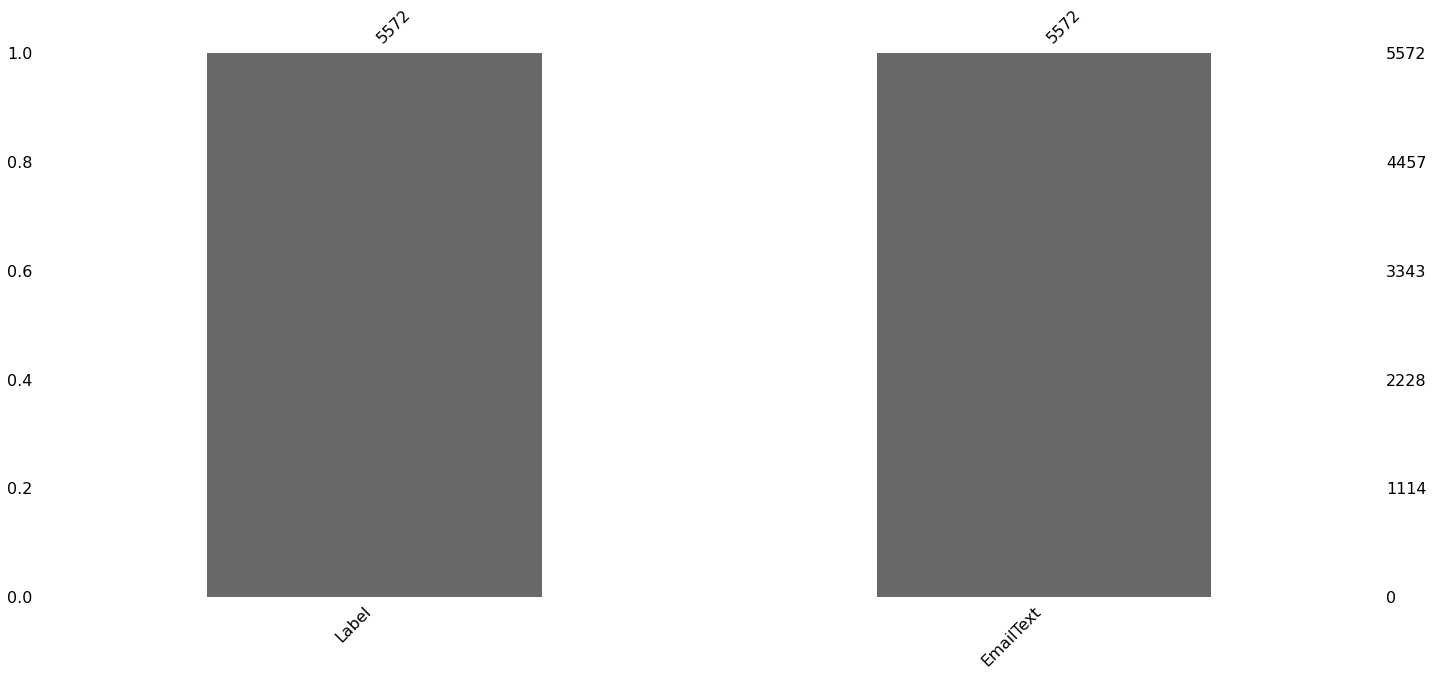

In [ ]:
#visualizing the null values for each attribute


import missingno as msno

#msgo ---->  It's also the name of a Python library for the exploratory visualization of missing data.

msno.bar(df)
#ploting the bar graph

plt.show()
#Show the image

Counter({'ham': 4825, 'spam': 747})


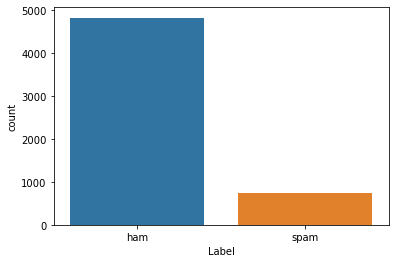

In [ ]:
sns.countplot(x='Label', data = df)
#is used to Show the counts of observations in each categorical bin using bar


from collections import Counter
#Counter is a container which stores the count of elements in a dictionary format where element is the key and its value corrosponds to it's count.

counter = Counter( df [ 'Label' ])
#passing 'Class' feature in the Counter , it tells no. of 1s and 0s present in the dataset

print(counter)
#print the counter variable



**This indicates the imbalanced data had found**

In [ ]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:])

     Label                                          EmailText
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


**NOTE**
- To know the duplicates on the data, There are 403 rows of duplicates 

#### Remove the duplicates

In [ ]:
#drop the duplicates by using duplicate maethod
df.drop_duplicates(inplace = True)

In [ ]:
#show the new shape having number of rows and columns after duplication is dropped

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5169 rows and 2 columns are present in the Data Set


**Note**
> - **There are 403 duplicate records are present in the dataset so we are removed , now there is 5169 rows of data**

### Pre-processing


In [ ]:
from nltk.corpus import stopwords # for stop words

In [ ]:


def pre_processing(text):
    
    text = str(text).lower()  # Converted into lower case
    
    spl_char_text = re.sub(r'[^a-z]',' ',text) # removed numbers and special characters
    
    # remove aall punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove all stop words
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # return a list of clean text
    return clean_words
    


In [ ]:
df['EmailText'].head().apply(pre_processing)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#import a CountVectorizer

In [ ]:
# convvert a collection of EmailText to a matrix of tokens

bow = CountVectorizer(analyzer= pre_processing).fit_transform(df['EmailText'],df['Label'])

In [ ]:
 df1 = pd.get_dummies(df, columns=['Label'], drop_first=True)

#spam = 1
#Ham =0

In [ ]:
df1

,EmailText,Label_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ã_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


### Split the dataset into training and testing

#### Train_Test_Split
> - Reference link : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
> - **Train-Test Split Evaluation**
- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- It can be used for classification or regression problems and can be used for any supervised learning algorithm.

- The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.
- The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

>  common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

In [ ]:
#Lets check the shape of the data, after pre_process,removed stopwords
bow.shape

(5169, 9431)

In [ ]:

#importing train_test_split
from sklearn.model_selection import train_test_split

## split into train tests sets
x_train,x_test,y_train,y_test=train_test_split(bow,df1["Label_spam"],test_size=0.2)

### Build the model

In [ ]:
# import the SVM

from sklearn import svm

#import GridSearchCV to know the best parameters
from sklearn.model_selection import GridSearchCV

In [ ]:
##Step: Build a model

# Tunne all the parameters
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

#train the model with  perfrom all kernels, gamma, C 
model = GridSearchCV(svm.SVC(), tuned_parameters)

#Build the model and fit to train and test

model.fit(x_train,y_train)


#See the best parameters
print(model.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### NOTE : Best Parameters are :
> - **'C':       100**
> - **'gamma':   0.001**
> - **'kernel':  'rbf'**

In [ ]:
#Train the model, using the best parameters

model1=svm.SVC(C= 100, gamma= 0.001, kernel= 'rbf',probability=True)

In [ ]:
# fit the model on x_train, y_train
model1.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predict the model on test 
y_pred=model1.predict(x_test)

In [ ]:
#predict the models and probabilities
y_pred_proba=model1.predict_proba(x_test)[:,1]

In [ ]:
#check the all probabilities
y_pred_proba

array([0.00053274, 0.00220692, 0.01705265, ..., 0.00079616, 0.00515363,
       0.00305332])

In [ ]:
#import the libraries for stats metrices
import numpy as np

#importing the Confusion matrix metrics and classification reports
from sklearn.metrics import confusion_matrix, classification_report

#Importing cohen_kappa_score and roc_auc_score metrices
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

#importing visualizing library
import matplotlib.pyplot as plt
import seaborn as sns

#logloss to check is there loss or difference
from sklearn.metrics import log_loss

#Creating a Function name called Classification Metric
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['Ham','Spam'])
    """
    # confusion matrix
    
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    
    plt.figure(figsize=(10,6))
    #plotting a fig size as 10 width and 6 height
    
    
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)
    #create a heapmap using seaborn libarary and used various parametere

    plt.xlabel('Predicted Values')
    #ploting the values on x- axis as Predicted values
    
    plt.ylabel('Actual Values')
    #ploting the values on y- axis as actual values
    
    plt.title('Confusion Matrix')
    # Mentioning the title of the figure
    
    plt.show()
    #show the image
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    #showing * are to put a  line to style
    
    #created classification report
    cr = classification_report(y_test,y_pred)
    
    #print the classifiaction report
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    
    
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    
    
    plt.figure(figsize=(8,5))
    #plot the figuare based on width and height sizes
    
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    #fpr false positive rate
    #tpr true positive rate
    
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    #fpr on x -axis 
    
    plt.ylabel('True Positive Rate')
    #tpr on y axis
    
    plt.title('Receiver Operating Characterstic')
    #mentioning the title of the figuare
    
    plt.legend(['AUC = {}'.format(roc_a)])
    #assign the legend to the figuare
    
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    #mentioning then line width as 2.0
    
    plt.grid()
    # show the grid lines to the image
    
    plt.show()
    #display the image
    
  # A point beyond which there is a change in the manner a program executes  
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

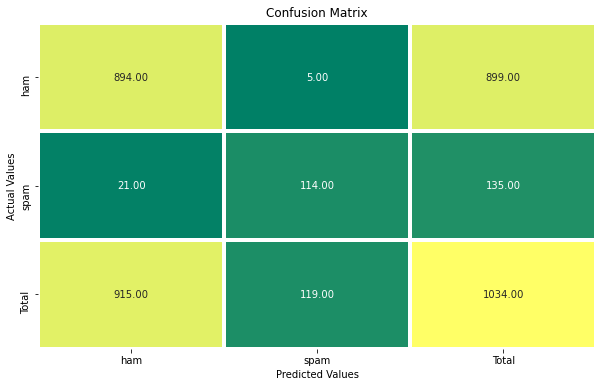

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.96      0.84      0.90       135

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034


************************************Kappa Score************************************


Kappa Score = 0.8833696302916193

******************************Area Under Curve Score******************************


AUC Score = 0.9194413545915215
Number of probabilities to build ROC = 54


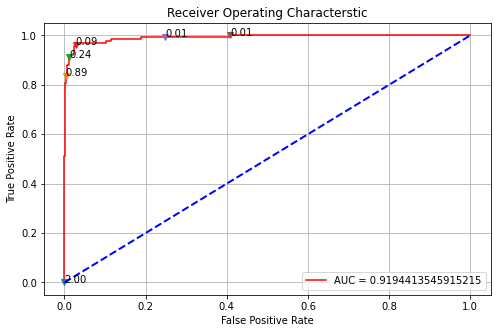

In [ ]:
#Calling the Classification_metric function. It will displays all the metrices which are we created earlier

classification_metric(y_test,y_pred,y_pred_proba,['ham','spam'],n=10,verbose=True)

# VERBOSE : This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments.

## Note :- 
> - **Accuracy** - 0.97
> - **Kappa Score** - 0.88
> - **AUC SCORE** -   0.91
